In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy import stats

sc = StandardScaler()

%matplotlib inline

In [58]:
df = pd.read_csv('data.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


B    357
M    212
Name: diagnosis, dtype: int64

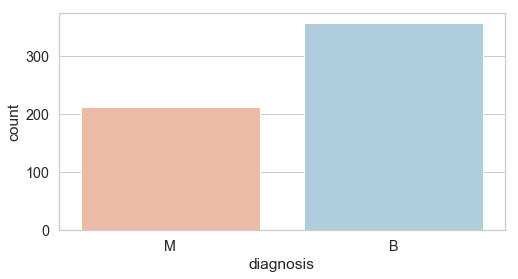

In [4]:
plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'], palette='RdBu')

df['diagnosis'].value_counts()
# check if the dataset is good to learning

In [5]:
# diagnosis, is categorical and has two classes, 'B' (Benign) and 'M' (Malignant).

In [59]:
df = df.drop('Unnamed: 32', axis=1)
# we don't need this column 

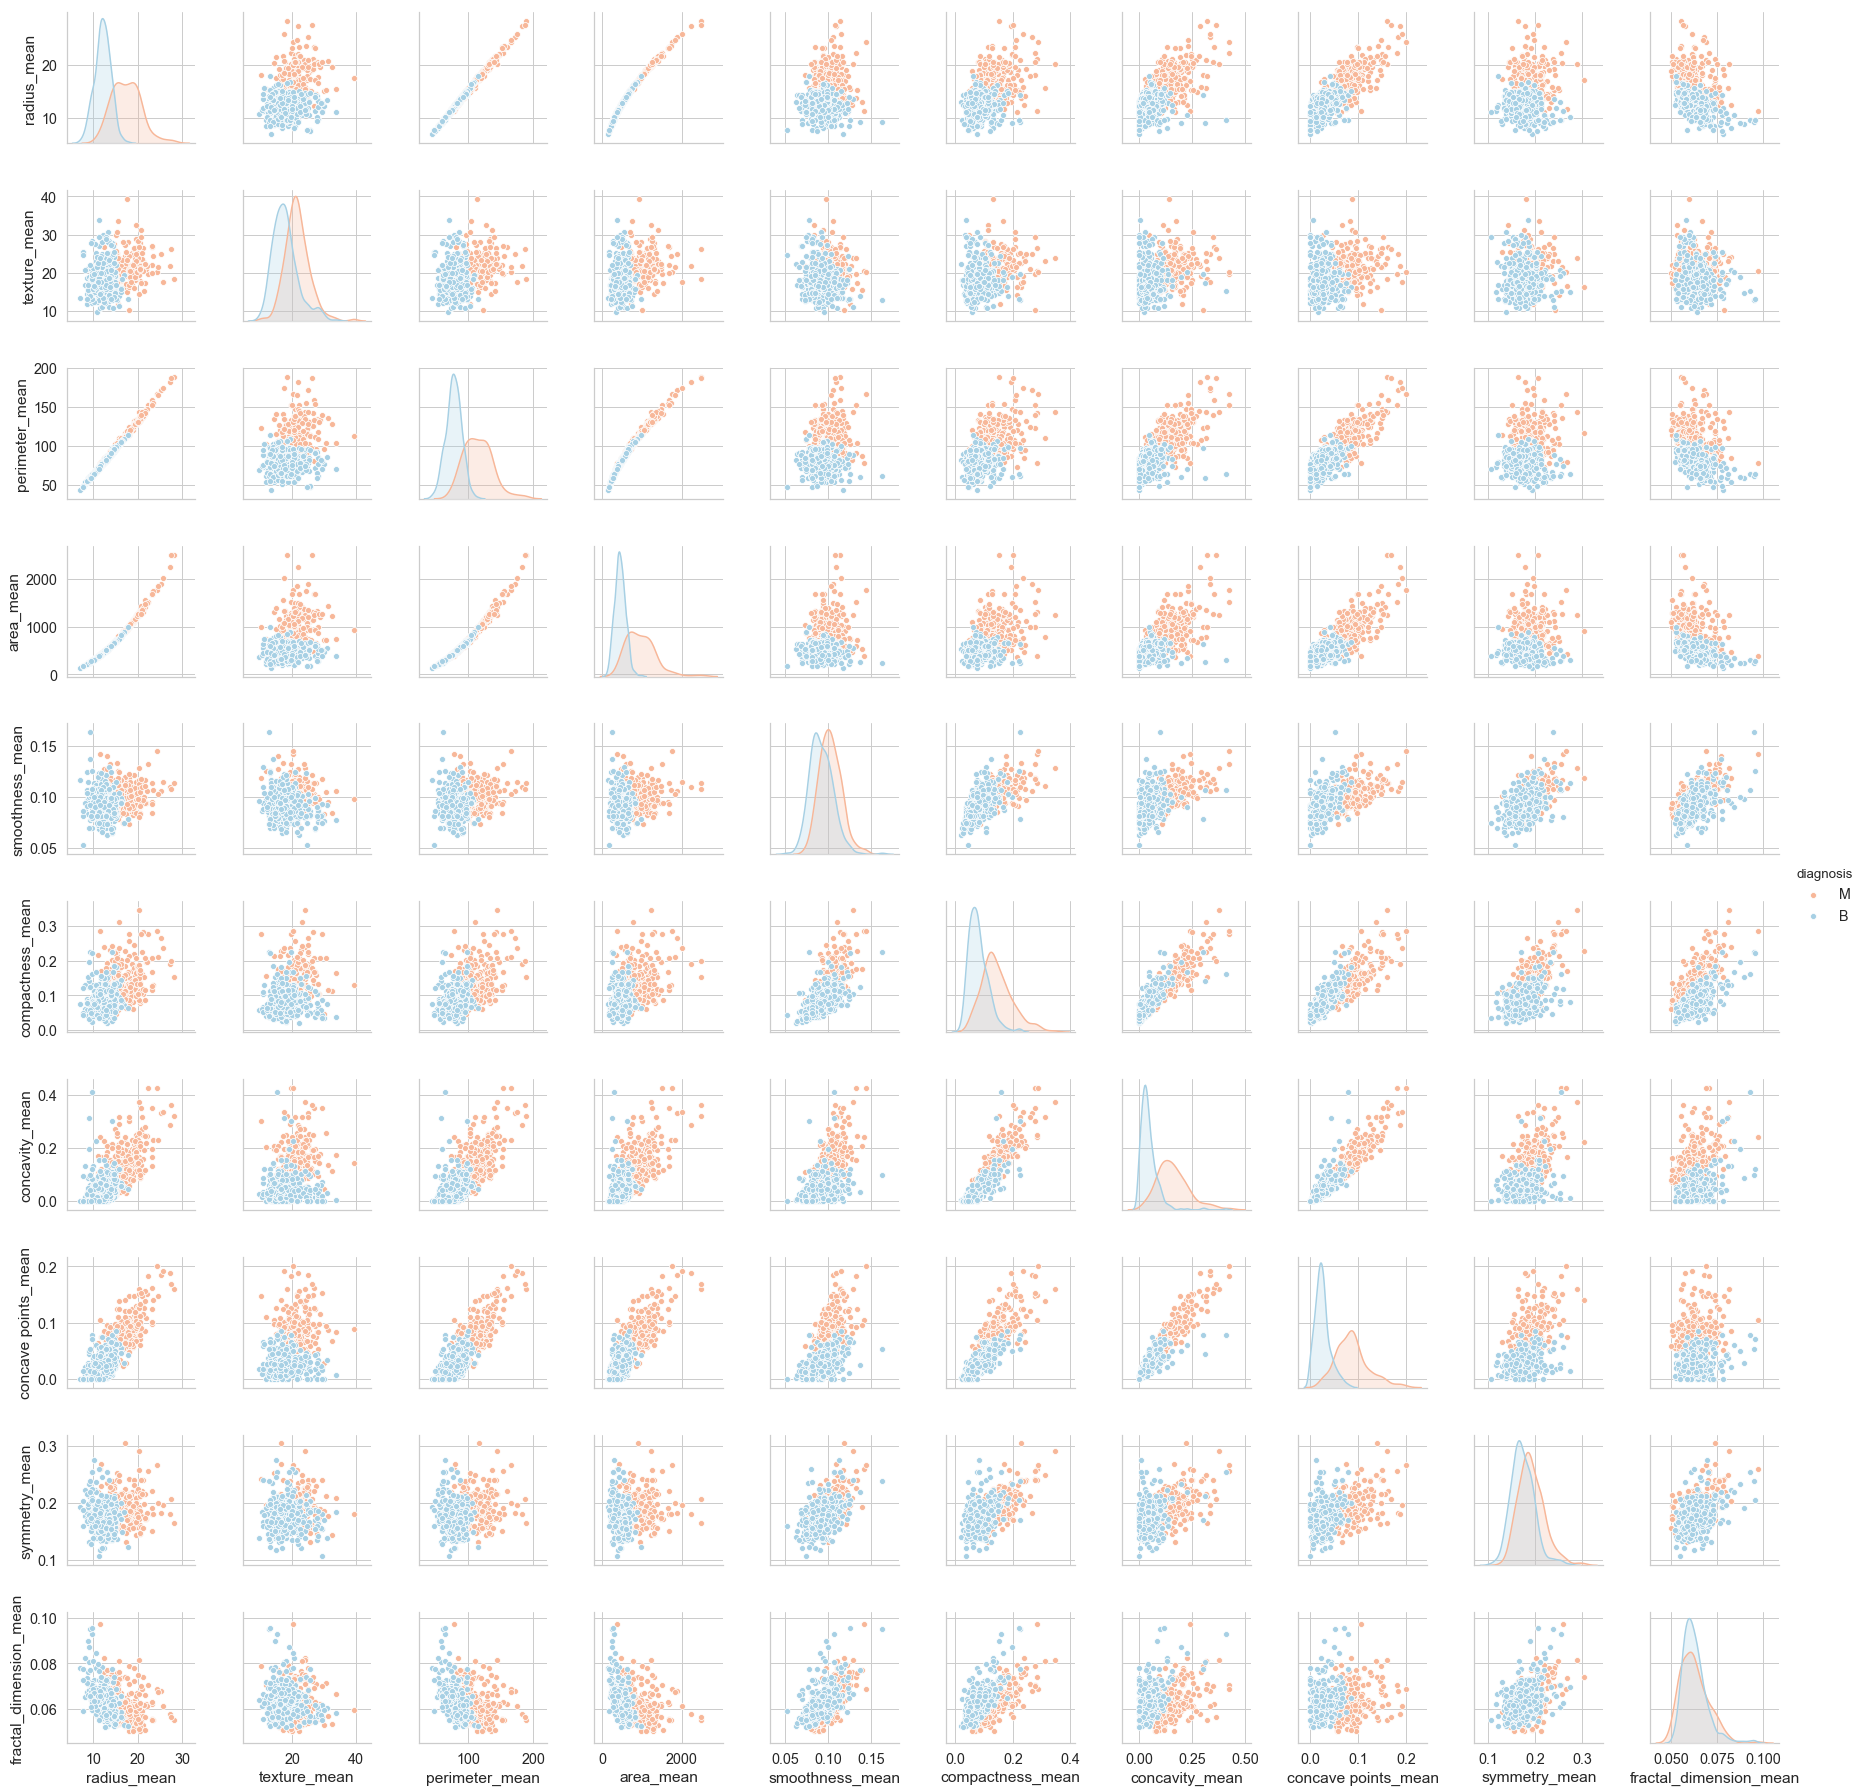

In [7]:
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='RdBu')
# study each two features with diagnosis seperately

In [60]:
# There's two visiable patterns, 1. radius, perimeter and area attributes are forming linear relation. 
# Another set of attributes that related to each are concavity, concave_points and compactness.
df.loc[df.diagnosis =='M', 'diagnosis'] = 0
df.loc[df.diagnosis =='B', 'diagnosis'] = 1

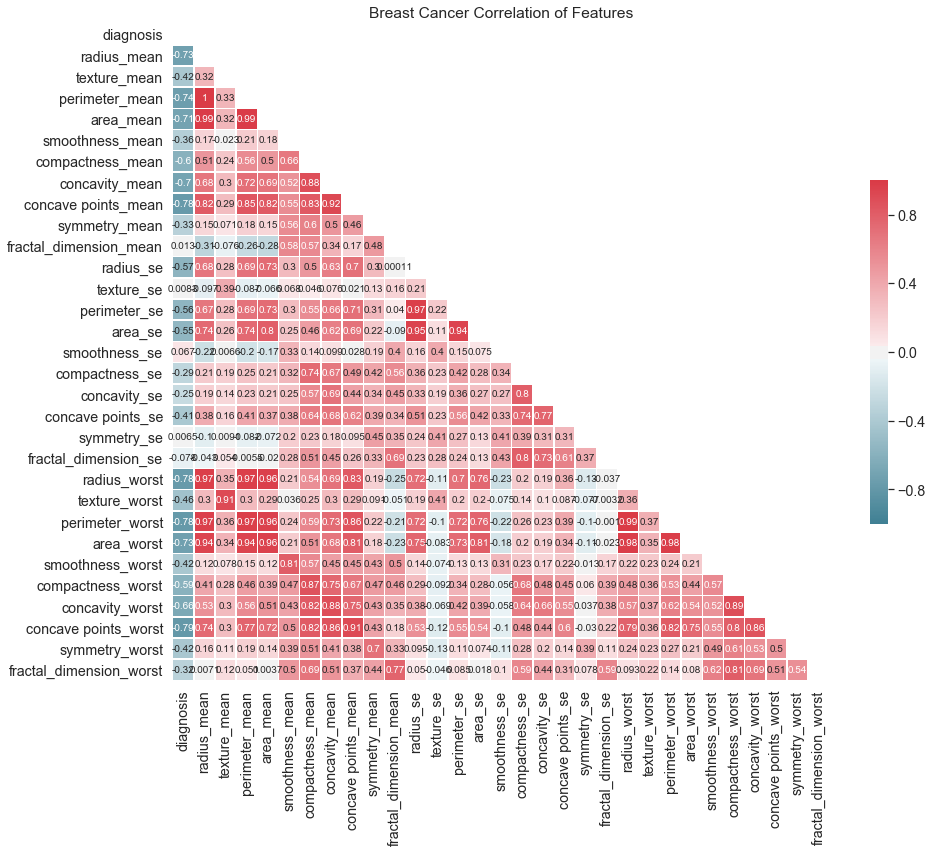

In [9]:
colormap = plt.cm.RdBu
corr = df.astype(float).corr();
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14,12))
plt.title('Breast Cancer Correlation of Features')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [10]:
# We see strong positive correlation with mean values of radius, parameter, area, and perimeter
# Also we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

In [61]:
# The "worst" columns are essentially just a subset of the "mean" columns
# Therefore, I think we should discard the "worst" columns from our analysis and only focus on the "mean" & "standard error" columns.
# we don't need the three attributes that describe the size of cells, just one we need I think cell's radius is 
# the basic building block of its size.
# and I think compactness is the best attribute to represent the shape

cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst',
        'perimeter_mean',
        'area_mean',
        'perimeter_se', 
        'area_se',
        'concavity_se', 
        'concave points_se']
df = df.drop(cols, axis=1)

# concavity mean
# concavity points mean
# area mean
# preimeter mean
# radius mean
# compactness mean 
# smoothness mean
# concavity mean
# texture mean
df.head()

NameError: name 'stats' is not defined

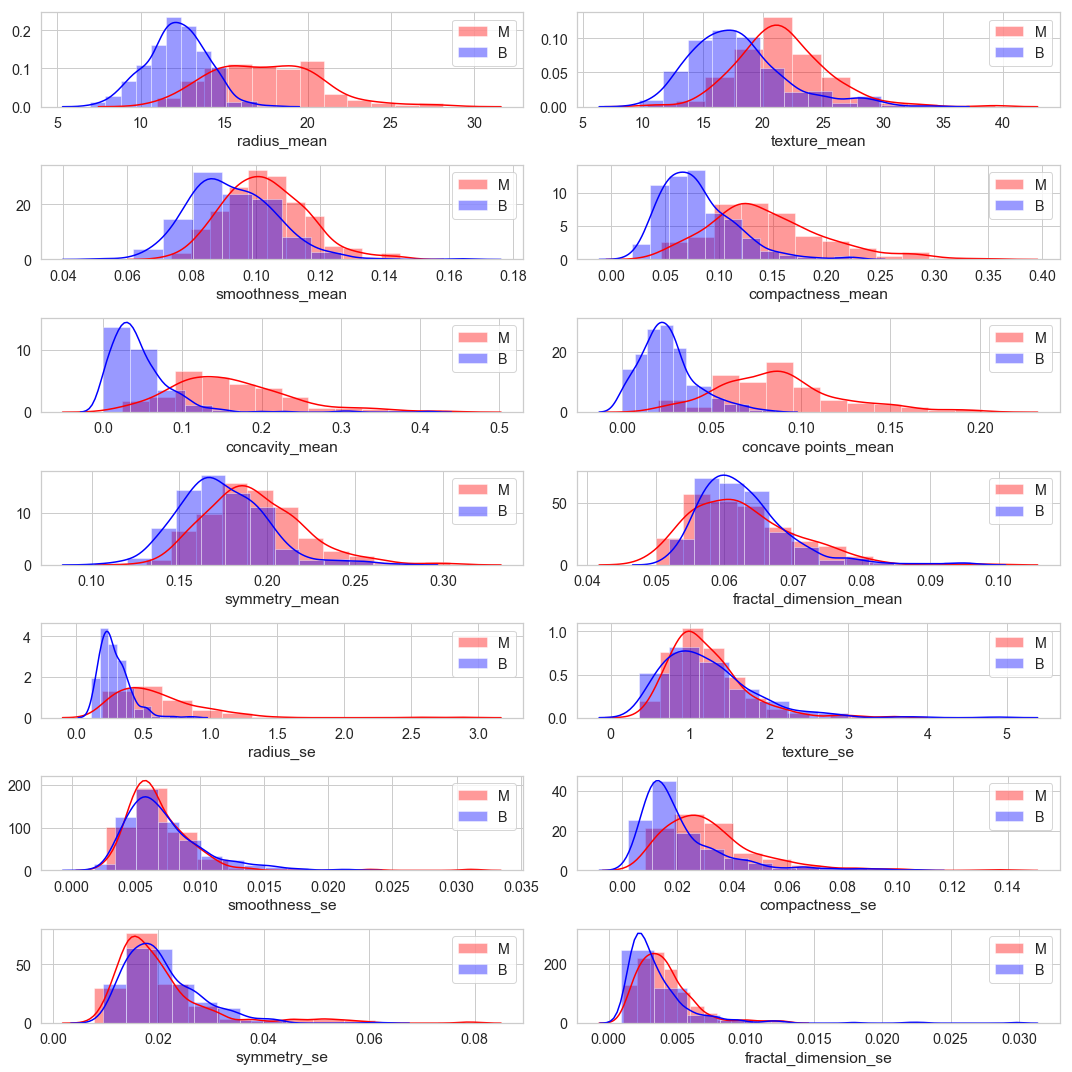

In [12]:
bins = 12
features_mean= list(df.columns[1:15])
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(df[df['diagnosis']==0][feature], bins=bins, color='red', label='M');
    sns.distplot(df[df['diagnosis']==1][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

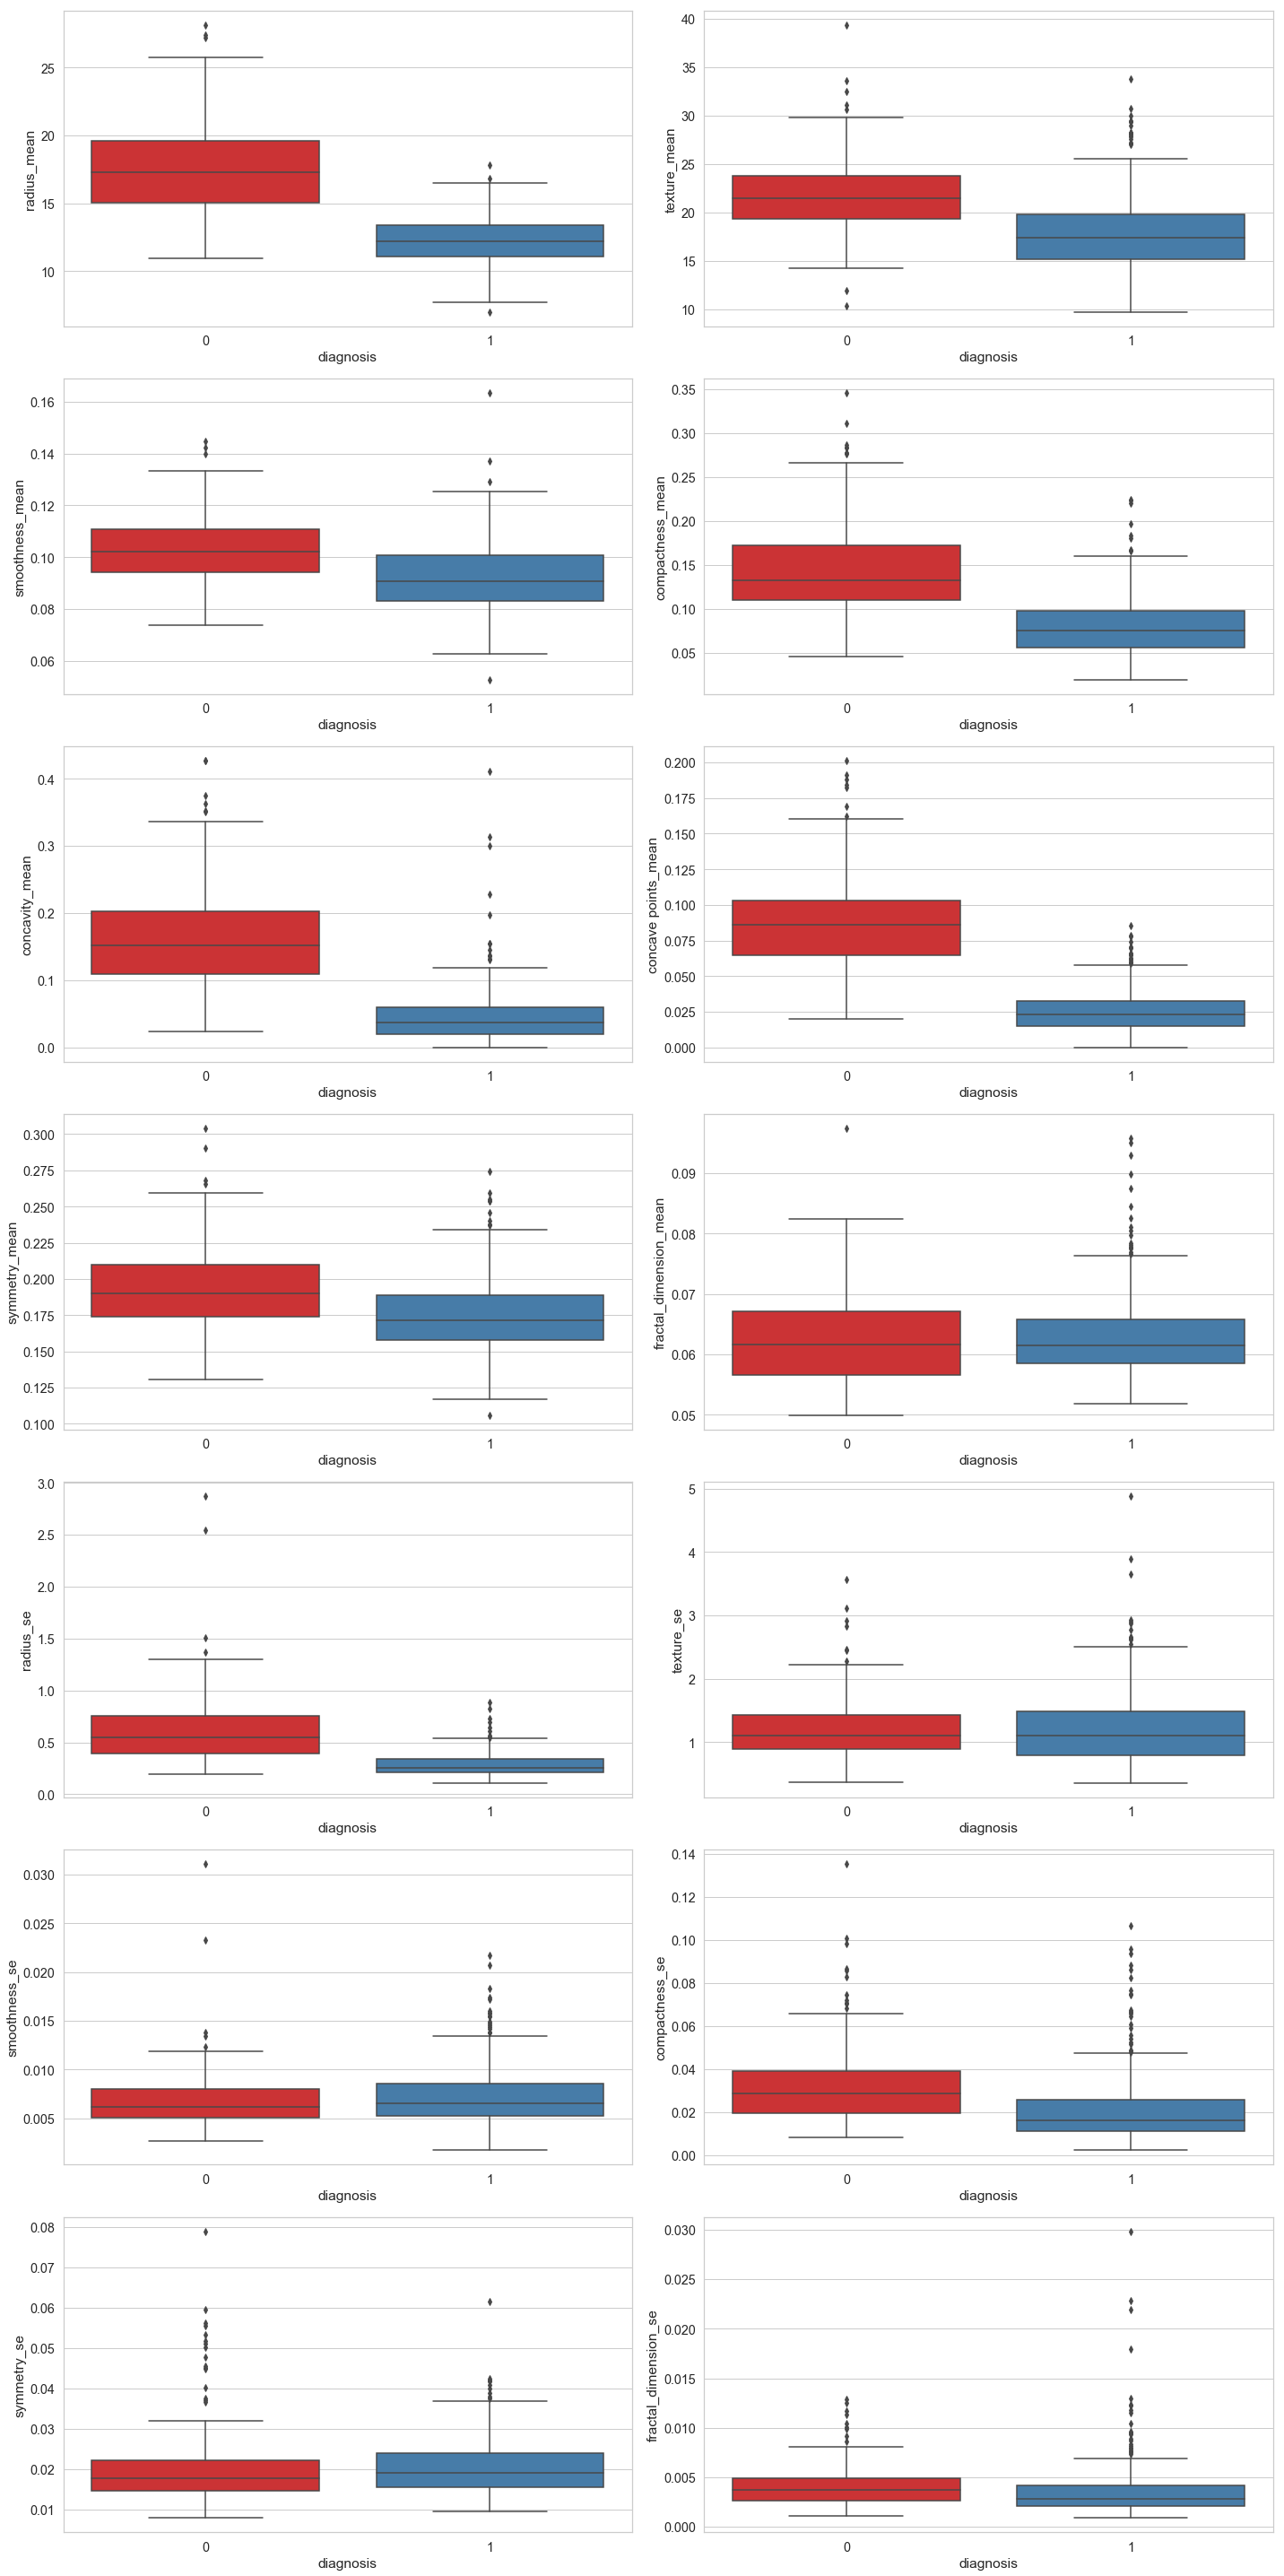

In [13]:
# - We can see that perhaps the attributes concavity,and concavity_point may have an exponential distribution.
# - We can also see that perhaps the texture and smooth and symmetry attributes may nearly have Gaussian distribution
plt.figure(figsize=(20,40))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis', y=feature, data=df, palette="Set1")

plt.tight_layout()
plt.show()

In [14]:
"""
We see this features (symmetry_mean, symmetry_se, smoothness_se, smoothness_mean, texture_se, fractal_dimension_mean)
are useless because we can not classify the output based on them 
Features that affect on the result:-
    - raduis_mean (M: greater or equal than 15, B: less than 15)
    - texture_mean (M: greater or equal than 21, B: less than 21)
    - compactness_mean (M: greater or equal than 0.13, B: less than 0.13)
    - concavity points_mean (M: greater or equal than 0.05, B: less than 0.05)
    - raduis_se (M: greater or equal than 0.4, B: less than 0.4)
    - raduis_mean (M: greater or equal than 15, B: less than 15)
    - compactness_se (M: greater or equal than 0.03, B: less than 0.03)
    Mean values of cell radius, texture, compactness, concavity and concave points can be used in classification of the cancer.
    Larger values of these parameters tends to show a correlation with malignant tumors. 
    mean values of smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. 
    In any of the histograms there are no noticeable large outliers that warrants further cleanup.
"""

def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
print("Column Name           # of outliers     Mean_With_Outliers      Mean_Without_Outliers        isGreaterThan 5% ")
for col in df.columns: 
    outlier = detect_outlier(df[col])
    if (len(outlier) == 0):
        print(col + " , there's no outliers " )
        continue
    minValue = min(outlier)
    isLessThanFivePercent = False
    if (((len(outlier)/df[col].count())*100) >= 5):
        isLessThanFivePercent = True

    print(col + "           " + str(len(outlier)) + "  " + str(round(df[col].mean(),6)) + "  " + str(round(df[df[col]<minValue][col].mean(),6)) + "   " +str(isLessThanFivePercent) )

# Proportion of outliers is less than five percent, no effect on the mean, not required further cleanup. 

Column Name           # of outliers     Mean_With_Outliers      Mean_Without_Outliers        isGreaterThan 5% 
diagnosis , there's no outliers 
radius_mean           5  14.127292  14.015477   False
texture_mean           4  19.289649  19.179982   False
smoothness_mean           5  0.09636  nan   False
compactness_mean           9  0.104341  0.10136   False
concavity_mean           9  0.088799  0.084196   False
concave points_mean           6  0.048919  0.047458   False
symmetry_mean           5  0.181162  0.180282   False
fractal_dimension_mean           7  0.062798  0.062436   False
radius_se           7  0.405172  0.38855   False
texture_se           9  1.216853  1.181526   False
smoothness_se           7  0.007041  0.006862   False
compactness_se           12  0.025478  0.023977   False
symmetry_se           11  0.020542  0.019852   False
fractal_dimension_se           10  0.003795  0.003564   False


In [56]:
df.shape
X = df[['radius_mean', 'texture_mean', 'radius_se', 'compactness_se','compactness_mean']]

X = sc.fit_transform(X)
Y = df['diagnosis']

X = sm.add_constant(X)

cm_surv = ["darkgrey" , "lightgreen"]
model = sm.Logit(Y, X, missing='drop').fit()
model.summary()



Optimization terminated successfully.
         Current function value: 0.155219
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Sat, 29 Jun 2019   Pseudo R-squ.:                  0.7649
Time:                        20:53:42   Log-Likelihood:                -88.320
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                5.622e-122
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6357      0.225      2.829      0.005       0.195       1.076
x1            -3.2452      0.448     -7.237      0.000      -4.124      -2.366
x2            -1.3383      0.236     -5.682      0.000      -1.800      -0.877
x3            -1.5446      0.455     -3.398      0.001      -2.436      -0.654
x4             1.5588      0.326      4.782      0.000       0.920       2.198
x5            -3.1083      0.430     -7.228      0.000      -3.951      -2.265
==============================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        63
           1       0.93      0.92      0.92       108

   micro avg       0.90      0.90      0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171

Accuracy of logistic regression classifier on test set: 0.901


C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


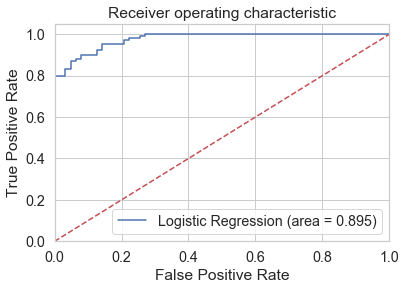

In [37]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
# Sensitivity: The probability of a positive test result if the cancer is present
# Specificity: The probability of negative test if the cancer is not present
# Probability of False Alarm = 1 - Specificity
# the best model will be close to up-left corner

In [38]:
X = df[['radius_mean', 'texture_mean', 'concavity_mean', 'concave points_mean','radius_se', 'compactness_se']]

X = sc.fit_transform(X)
X = sm.add_constant(X)
model = sm.Logit(Y, X, missing='drop').fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      562
Method:                           MLE   Df Model:                            6
Date:                Sat, 29 Jun 2019   Pseudo R-squ.:                  0.8055
Time:                        20:33:02   Log-Likelihood:                -73.079
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                1.692e-127
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4413      0.238      1.851      0.064      -0.026       0.909
x1            -2.2187      0.508     -4.368      0.000      -3.214      -1.223
x2            -1.4851      0.253     -5.869      0.000      -1.981      -0.989
x3            -1.8431      0.705     -2.614      0.009      -3.225      -0.461
x4            -3.3018      0.772     -4.276      0.000      -4.815      -1.788
x5            -0.6186      0.432     -1.434      0.152      -1.464       0.227
x6             1.3919      0.444      3.135      0.002       0.522       2.262
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
# As we see Pseudo R-squ is increased, which is good

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        63
           1       0.94      0.97      0.95       108

   micro avg       0.94      0.94      0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy of logistic regression classifier on test set: 0.942


C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


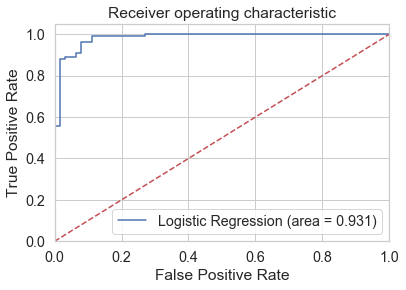

In [41]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
